Merge Pulled Zillow Listing Data to serve as a sample set for the the data creation project

# Date of Interest

In [750]:
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [751]:
type = 'singleFamily'

# Directories

In [752]:
# Imported Data Directory
imp_dir = 'C:/Users/Dev/Documents/Real Estate Data/data/sample/actual listings'

# Cleaned Data Directory
processed_dir = 'C:/Users/Dev/Documents/Real Estate Data/data/sample/created listings'

# Files

In [753]:
# Imported Data 
pull = f'{type}_real_listings.csv'

# Created Data 
created = f'{type}_created_listings.csv'

# Cleaned Data
single = 'singleFamily_real_listings.csv'
multi = 'multiFamily_real_listings.csv'
condo = 'condo_real_listings.csv'
town = 'townhouse_real_listings.csv'

# Load Data Frame

In [754]:
file_path = os.path.join(imp_dir, pull)
df = pd.read_csv(file_path, low_memory=False)

# Pre Load Data for Model

In [755]:
df = df.drop(columns=['city', 'state', 'streetAddress', 'homeType'])

data = df
data

,zipID,zipcode,latitude,longitude,beds,baths,sqft,price
0,27666682,77650.0,29.464958,-94.607540,4.0,4.0,1840.0,769000
1,27689601,77650.0,29.383598,-94.768166,3.0,2.0,1408.0,200000
2,89537714,77650.0,29.471834,-94.596535,3.0,2.0,1080.0,350000
3,27686372,77650.0,29.461786,-94.610950,3.0,2.0,1107.0,775000
4,353492656,77650.0,29.464540,-94.640396,3.0,2.0,1440.0,390000
...,...,...,...,...,...,...,...,...
21197,2079939074,77033.0,29.654604,-95.348470,3.0,3.0,1892.0,277000
21198,27982729,77051.0,29.645168,-95.379196,3.0,2.0,1111.0,162000
21199,2055940257,77048.0,29.633030,-95.335106,3.0,2.0,1440.0,292780
21200,2060332592,77047.0,29.620047,-95.376785,3.0,2.0,1672.0,345000


# Add Variables

In [756]:
data['totalRooms'] = data['beds'] + data['baths']
data['bed_ratio'] = data['beds'] / data['totalRooms']

# Drop Null Values

In [757]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21086 entries, 0 to 21201
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zipID       21086 non-null  int64  
 1   zipcode     21086 non-null  float64
 2   latitude    21086 non-null  float64
 3   longitude   21086 non-null  float64
 4   beds        21086 non-null  float64
 5   baths       21086 non-null  float64
 6   sqft        21086 non-null  float64
 7   price       21086 non-null  int64  
 8   totalRooms  21086 non-null  float64
 9   bed_ratio   21086 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.8 MB


# Heat Map and Correlation

<Axes: >

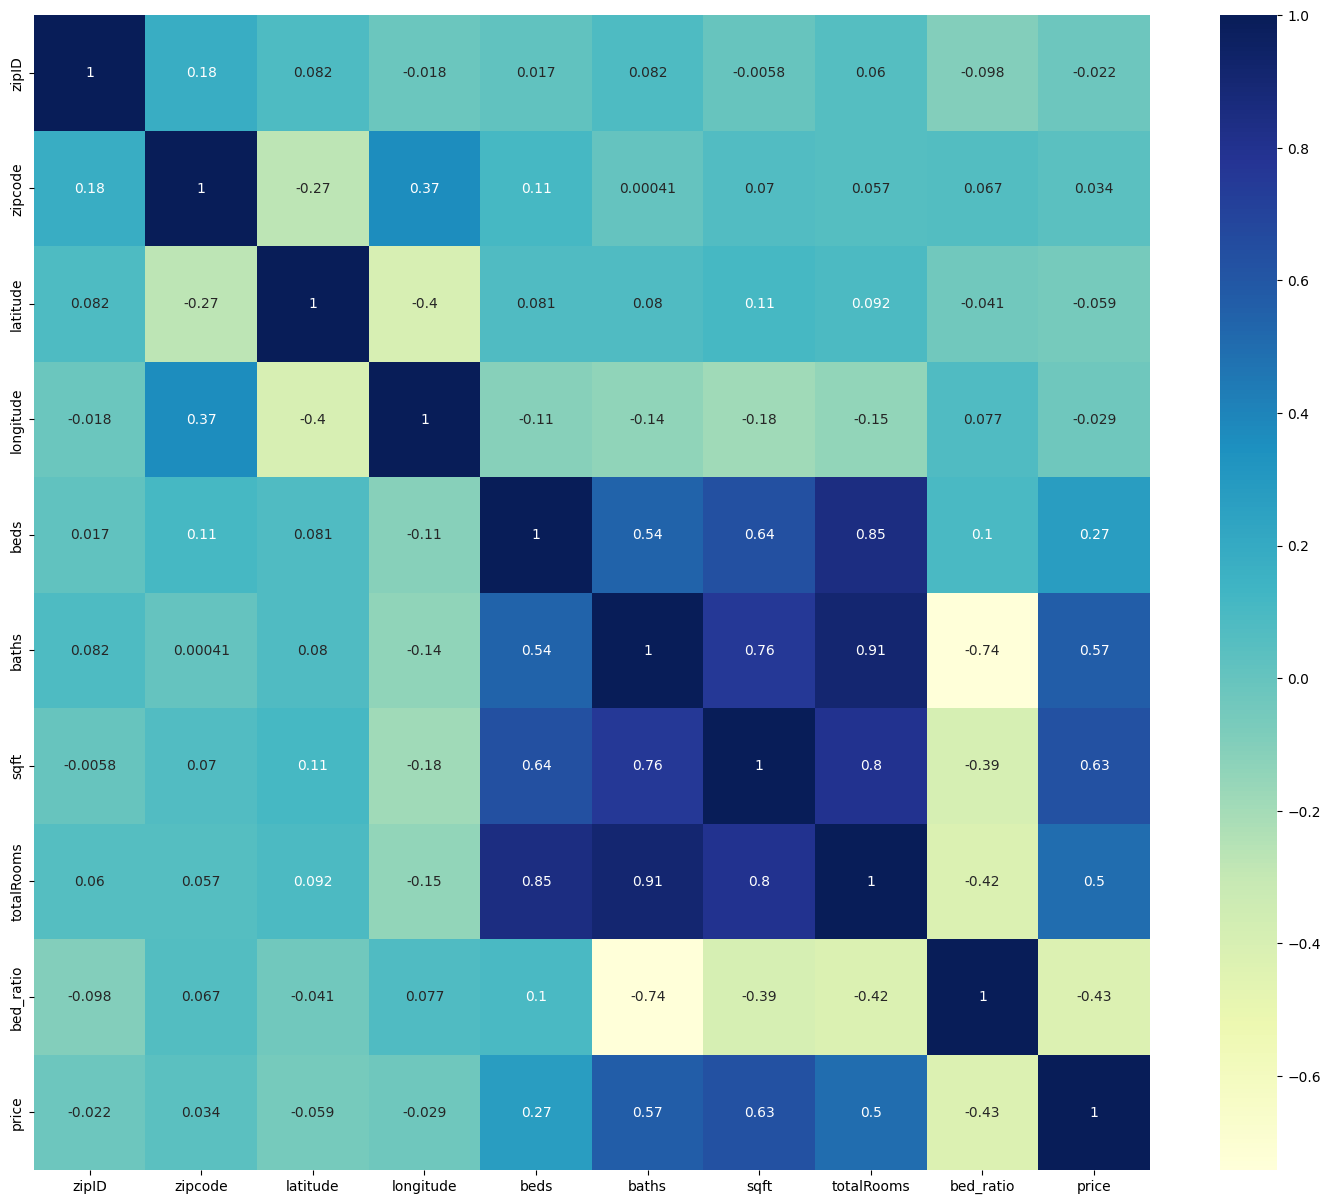

In [758]:
plt.figure(figsize=(18, 15))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='longitude', ylabel='latitude'>

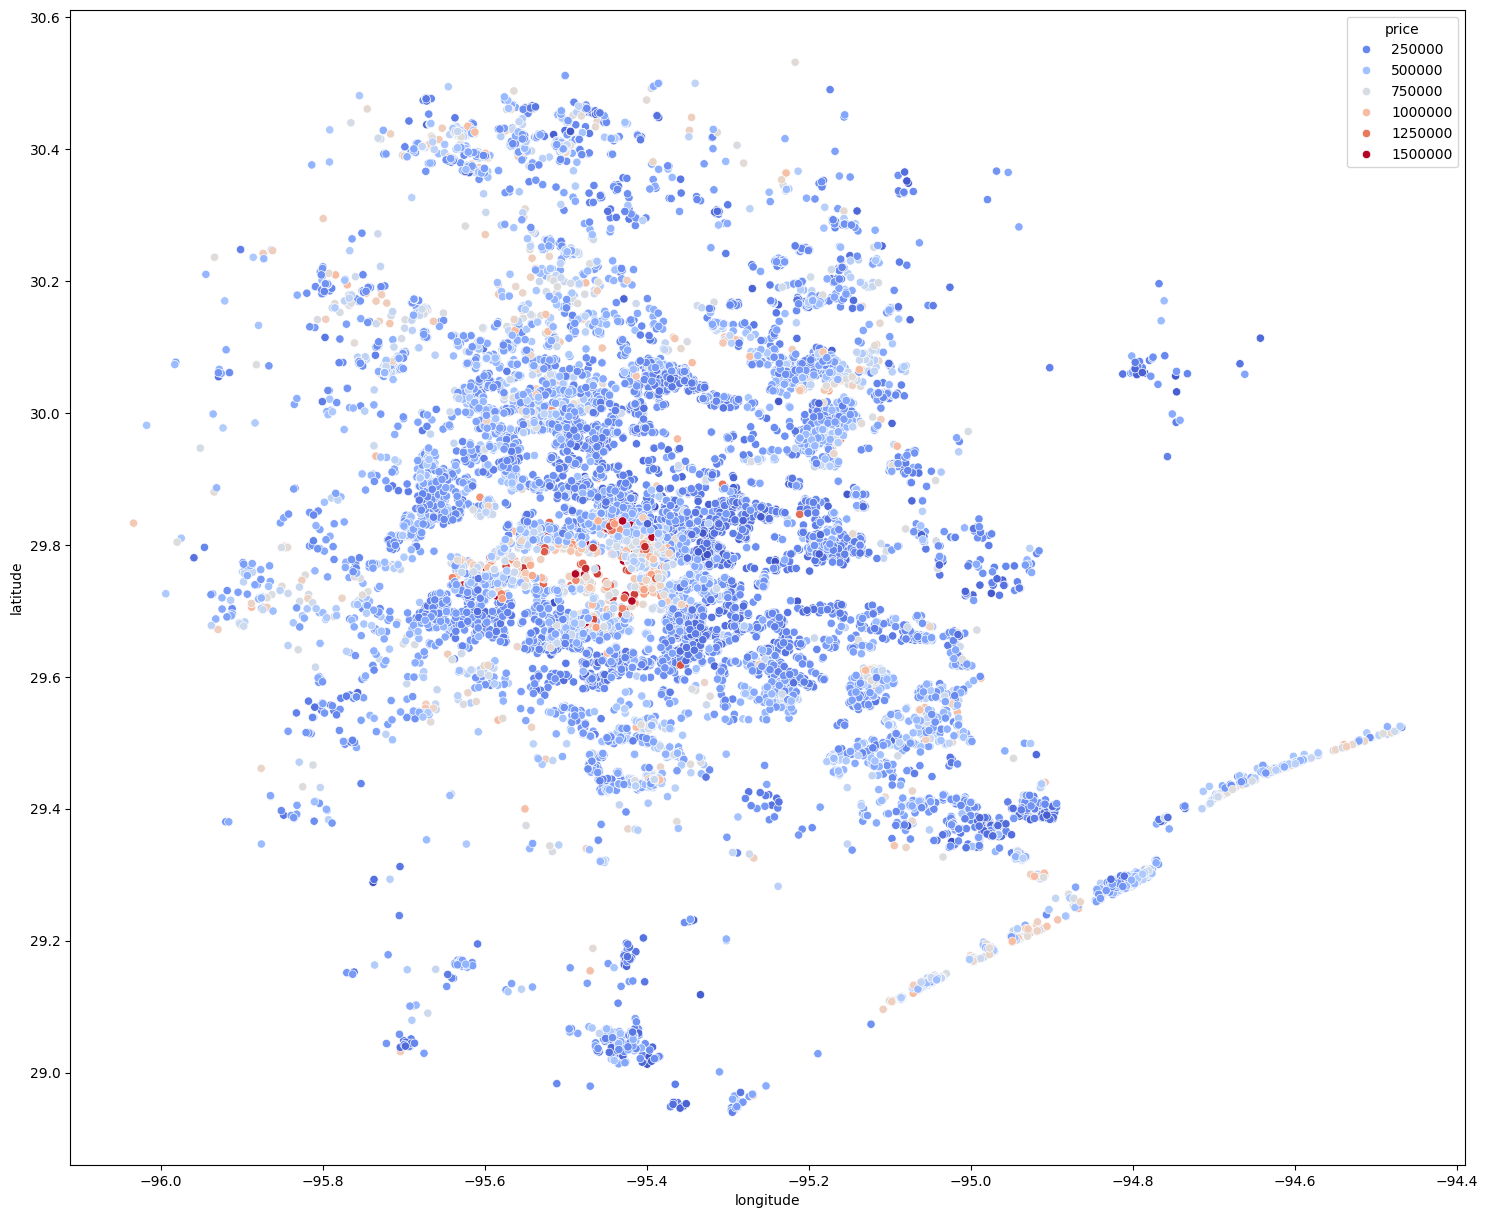

In [759]:
plt.figure(figsize=(18, 15))
sns.scatterplot(x ='longitude', y ='latitude', data=train_data, hue='price', palette='coolwarm')

# Separate by Zipcode

In [761]:
zipcode = data.groupby('zipcode').agg(
    averagePrice =('price', 'mean'),
    averageSqft =('sqft', 'mean'),
    averageBeds=('beds', 'mean'),
    averageBaths=('baths', 'mean')
).reset_index()

zipcode

,zipcode,average_price,average_sqft,average_beds,average_baths
0,77003.0,475768.144578,1974.855422,2.927711,3.349398
1,77004.0,472899.397436,2120.256410,3.153846,3.250000
2,77005.0,942601.592593,2233.703704,3.074074,2.962963
3,77006.0,836318.854839,2533.629032,3.193548,3.274194
4,77007.0,685048.995475,2443.009050,3.099548,3.579186
...,...,...,...,...,...
186,77591.0,291358.870056,1892.084746,3.519774,2.491525
187,77598.0,435565.596154,2270.250000,3.596154,2.653846
188,77617.0,533444.709677,1368.483871,2.935484,2.516129
189,77650.0,552134.579096,1497.019774,3.045198,2.381356
